In [ ]:


Others
# Spectrum and cepstrum: http://flothesof.github.io/cepstrum-pitch-tracking.html
# Spectrum: https://www.cbcity.de/die-fft-mit-python-einfach-erklaert
# cepstrum https://github.com/python-acoustics/python-acoustics/blob/master/acoustics/cepstrum.py
# MFCC: https://en.wikipedia.org/wiki/Mel-frequency_cepstrum

# MFCC: https://github.com/IlyaMichlin/MFCC/blob/master/MFCC.ipynb
    




In [649]:
# source: https://courses.engr.illinois.edu/ece590sip/sp2018/spectrograms1_wideband_narrowband.html

In [704]:
import soundfile as sf   # We use this one to read and write sound file
import math # basic math functions
import scipy.io.wavfile

import io # We use this one for basic file input/output operations
import numpy as np   # We use this one to do numerical operations
import scipy.fftpack as fftpack # We use this one to perform Fourier transforms
import urllib.request as request  # We use this one to get things from the web
import matplotlib.pyplot as plt  # We use this one to plot things
import librosa
import librosa.display

# The next line causes matplotlib to put its plots in this webpage.  That's reasonable for small spectrograms, maybe less than one second.


In [705]:
input_dir = './data/'
output_dir = './data/output/figures/'
wav_name = 'rainbow'
savefig = True

In [706]:

fs, signal = scipy.io.wavfile.read(input_dir+f'{wav_name}.wav')  # File assumed to be in the same directory
audio_length = len(signal)/fs 
print(f'length {audio_length}')
# signal = signal[0:int(3.5 * sample_rate)]  # Keep the first 3.5 seconds

length 0.7533786848072562


See how long one period is: this will tell you about the F0. Compare high pitch vs low pitch. 

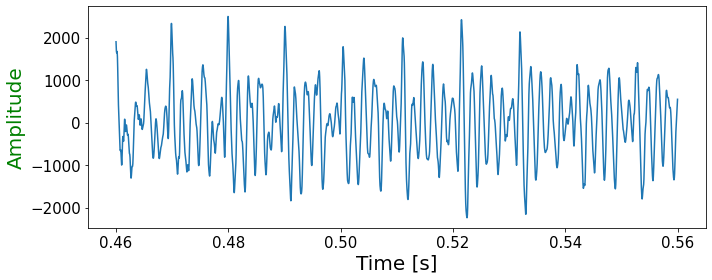

In [445]:
# cropped version
start = 0.46
duration = 0.1
signal_cropped = signal[int(start*fs):int((start+duration)*fs)]
signal_to_plot = signal_cropped.copy()

# We'll use the numpy function "linspace" to create a time axis for plotting
p_timeaxis = np.linspace(start,start+duration,len(signal_to_plot))

plt.figure(figsize=(10,4))


plt.plot(p_timeaxis,signal_to_plot)
fontsize = 20
ticksize = 15
plt.ylabel('Amplitude', fontsize = fontsize, color='green')
plt.xlabel('Time [s]', fontsize = fontsize)
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)
plt.tight_layout()
if savefig:
    plt.savefig(output_dir+f'waveform_cropped_{wav_name}.png', dpi=300,  facecolor='w')



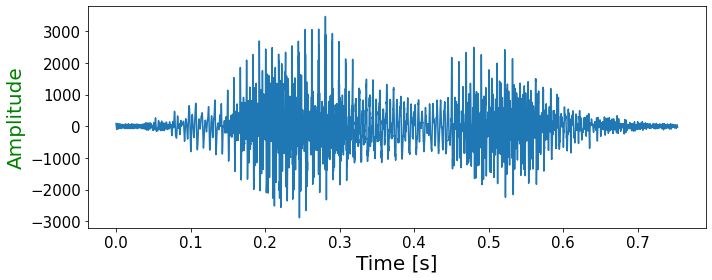

In [446]:
# for spectrogram and MFCCs, use full version
# full version
start = 0
duration = audio_length
signal_all = signal[int(start*fs):int((start+duration)*fs)]

signal_to_plot = signal_all.copy()


p_timeaxis = np.linspace(start,start+duration,len(signal_to_plot))

plt.figure(figsize=(10,4))

plt.plot(p_timeaxis,signal_to_plot)
fontsize = 20
ticksize = 15
plt.ylabel('Amplitude', fontsize = fontsize, color='green')
plt.xlabel('Time [s]', fontsize = fontsize)
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)
plt.tight_layout()
if savefig:
    plt.savefig(output_dir+f'waveform_full_{wav_name}.png', dpi=300,  facecolor='w')



In [488]:
len(signal)

33224

In [502]:
len(signal_cropped)

4410

Text(0.5, 1.0, 'time signal')

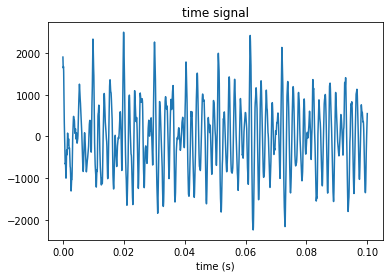

In [505]:
sample_freq = 44100 # Hz
frame_size = len(signal_cropped) #512, 2048, amon
time_vector = np.arange(frame_size) / sample_freq
# signal = make_harmonic_wave(440, sample_freq, frame_size, n_harmonics=20)

fig, ax = plt.subplots()
ax.plot(time_vector, signal_cropped)
ax.set_xlabel('time (s)')
ax.set_title('time signal')

In [512]:
freq_vector

array([0.000e+00, 1.000e+01, 2.000e+01, ..., 2.203e+04, 2.204e+04,
       2.205e+04])

(4409,)

(0.0, 3000.0)

<Figure size 864x288 with 0 Axes>

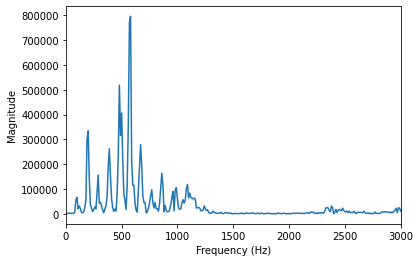

In [657]:
windowed_signal = np.hamming(frame_size) * signal_cropped
dt = 1/sample_freq
freq_vector = np.fft.rfftfreq(frame_size, d=dt)
X = np.fft.rfft(windowed_signal) #transform


# X = fftpack.fft(windowed_signal) #transform
log_X = np.log(np.abs(X)) #log abs hamming_windowed_signal


plt.figure(figsize=(12,4))

fig, ax = plt.subplots()

ax.plot(freq_vector,np.abs(X))

# ax.stem(range(0,3000,97), log_X[:len(range(0,3000,97))])
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Magnitude')
ax.set_xlim(0,3000)


(-0.001, 0.02)

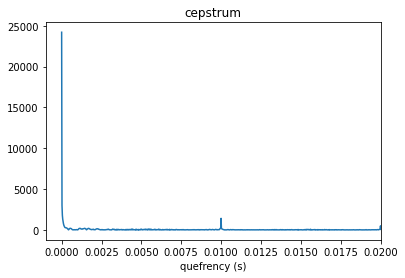

In [880]:
# cepstrum
cepstrum = np.fft.rfft(log_X)
df = freq_vector[1] - freq_vector[0]
quefrency_vector = np.fft.rfftfreq(log_X.size, df)

fig, ax = plt.subplots()
ax.plot(quefrency_vector, np.abs(cepstrum))
ax.set_xlabel('quefrency (s)')
# ax.set_title('cepstrum')
ax.set_xlim(-0.001,0.02)

# Windowing
Frame: assuming signal is periodic

Window: to make signal continuous and avoid high frequency distortions


In [447]:
def enframe(x,S,L):
   # w = 0.54*np.ones(L)
    #for n in range(0,L):
     #   w[n] = w[n] - 0.46*math.cos(2*math.pi*n/(L-1))
    w = np.hamming(L)
    frames = []
    nframes = 1+int((len(x)-L)/S)
    for t in range(0,nframes):
        frames.append(np.copy(x[(t*S):(t*S+L)])*w)
    return np.array(frames)

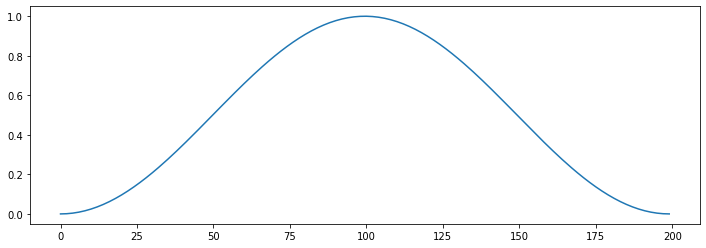

In [448]:
w = np.hanning(200)
plt.figure(figsize=(12,4))
plt.plot(w)

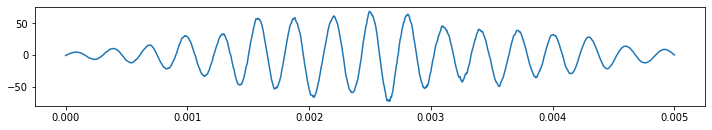

In [543]:
# Example of applying enframe to enframe to windows of 35 ms
window = 10
w_frames = enframe(signal_all,int(0.001*fs),int(0.035*fs))
plt.figure(figsize=(12,4))

plt.subplot(211)
plt.plot(np.linspace(0,0.005,len(w_frames[window])),w_frames[window])

(0.0, 3000.0)

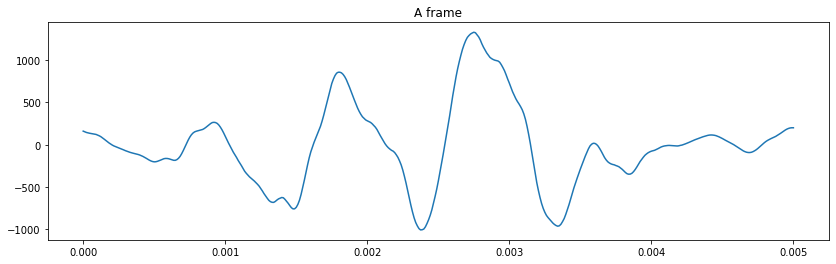

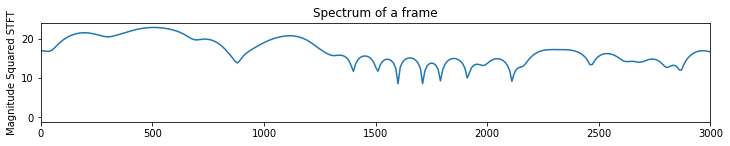

In [544]:
w_frames = enframe(signal_cropped,int(0.001*fs),int(0.010*fs))

plt.figure(figsize=(14,4))
plt.plot(np.linspace(0,0.005,len(w_frames[window])),w_frames[window])
plt.title('A frame')



def stft(frames,N,Fs):
    stft_frames = [ fftpack.fft(x,N) for x in frames]
    freq_axis = np.linspace(0,Fs,N)
    return(stft_frames, freq_axis)

# spectrum
(w_stft, w_freqaxis) = stft(w_frames, len(signal_cropped), fs)
plt.figure(figsize=(12,4))
plt.subplot(211)
plt.plot(w_freqaxis,np.log(np.maximum(1,abs(w_stft[window])**2)))
plt.ylabel('Magnitude Squared STFT')
plt.title('Spectrum of a frame')
plt.xlim(0,3000)

In [545]:
np.maximum(1,abs(w_stft[window]))

array([4936.10073243, 4871.39363591, 4705.33482085, ..., 4545.76610888,
       4705.33482085, 4871.39363591])

In [567]:
(1,abs(w_stft[window]))

(1,
 array([4936.10073243, 4871.39363591, 4705.33482085, ..., 4545.76610888,
        4705.33482085, 4871.39363591]))

In [612]:
len(abs(w_stft[window]))

4410

In [662]:
def stft(frames,N,Fs):
    stft_frames = [ fftpack.fft(x,N) for x in frames]
    freq_axis = np.linspace(0,Fs,N)
    return(stft_frames, freq_axis)


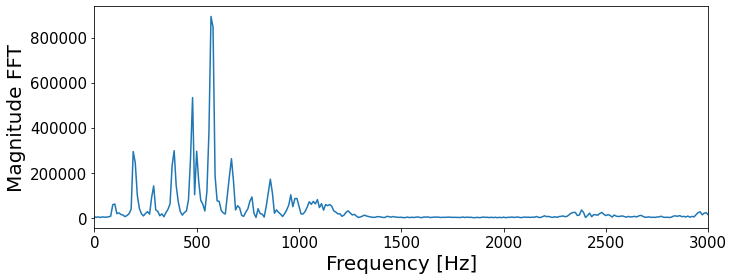

In [1011]:
# FFT

sample_freq = 44100 # Hz
frame_size = len(signal_cropped) #512, 2048, amon
windowed_signal = np.hamming(frame_size) * signal_cropped
dt = 1/sample_freq
freq_vector = np.fft.rfftfreq(frame_size, d=dt)
# freq_vector = fftpack.fftfreq(len(signal_1_window)) * fs
X = np.fft.rfft(windowed_signal)
X = np.abs(X)

fig, ax = plt.subplots(figsize = (10.3,4))
ax.plot(freq_vector, X_harmonics)
plt.ylabel('Magnitude FFT', fontsize=fontsize)
plt.xlabel('Frequency [Hz]', fontsize=fontsize)
plt.xlim(0,3000)
plt.xlim(0,3000)
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)
plt.tight_layout()
if savefig:
    plt.savefig(output_dir+f'spectrum_{wav_name}.png', dpi=300,  facecolor='w')

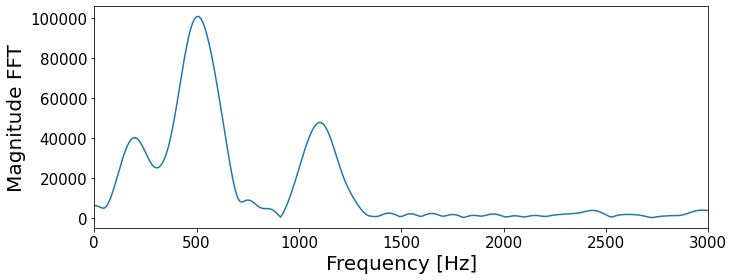

In [995]:
# Spectrum option B
# https://courses.engr.illinois.edu/ece590sip/sp2018/spectrograms1_wideband_narrowband.html

# If I instead do a Short-time Fourier transform for each 10msec frame at N different frequencies, I get this for one window:

start = 0.47
duration = 0.1
signal_cropped = signal[int(start*fs):int((start+duration)*fs)]



window = 10 #choose a window to plot

w_frames = enframe(signal_cropped,int(0.001*fs),int(0.01*fs))


# spectrum
(w_stft, w_freqaxis) = stft(w_frames, len(signal_cropped), fs)
X_framed = abs(w_stft[window]) #you can also take the log
plt.figure(figsize=(10.3,4))
# plt.stem(w_freqaxis[::10],X[::10])
plt.plot(w_freqaxis,X_framed)

plt.ylabel('Magnitude FFT', fontsize=fontsize)
plt.xlabel('Frequency [Hz]', fontsize=fontsize)
plt.xlim(0,3000)
plt.xlim(0,3000)
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)
plt.tight_layout()
if savefig:
    plt.savefig(output_dir+f'spectrum_window_{wav_name}.png', dpi=300,  facecolor='w')


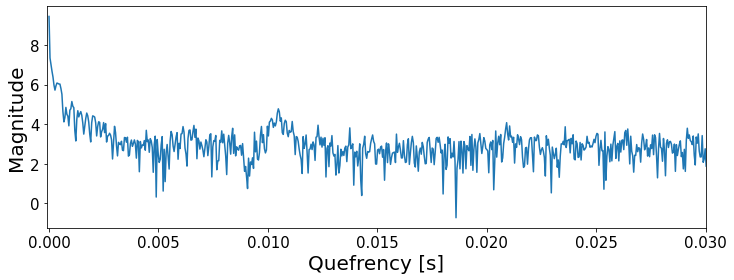

In [1019]:
# cepstrum
'''

1/f0 = peak

1/97 = 


'''
# sample_freq = 44100 # Hz
# frame_size = len(signal_cropped) #512, 2048, amon
# windowed_signal = np.hamming(frame_size) * signal_cropped
# dt = 1/sample_freq
# freq_vector = np.fft.rfftfreq(frame_size, d=dt)



# cepstrum = abs(w_stft[window]) #you can also take the log
log_X = np.log(X)
# log_X = X
cepstrum = np.fft.rfft(log_X)
df = freq_vector[1] - freq_vector[0]
quefrency_vector = np.fft.rfftfreq(log_X.size, df)



fig, ax = plt.subplots(figsize = (10.3,4))

ax.plot(quefrency_vector,np.log(abs(cepstrum)))
ax.set_xlabel('Quefrency [s]', fontsize=fontsize)
ax.set_ylabel('Magnitude', fontsize=fontsize)


ax.set_xlim(-0.0001,0.03)
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)
plt.tight_layout()
if savefig:
    plt.savefig(output_dir+f'cepstrum_{wav_name}.png', dpi=300,  facecolor='w')
# ax.set_yticks(fontsize=ticksize)

# Mel filters
https://towardsdatascience.com/getting-to-know-the-mel-spectrogram-31bca3e2d9d0


(0.0, 500.0)

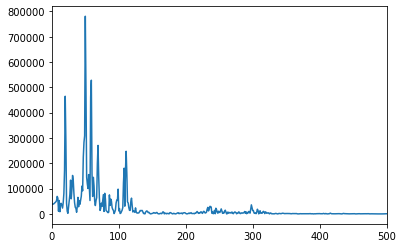

In [955]:
n_fft = len(signal_cropped)
signal_cropped = np.array([float(n) for n in signal_cropped])
D = np.abs(librosa.stft(signal_cropped[:n_fft], n_fft=n_fft, hop_length=n_fft+1))
plt.plot(D);
plt.xlim(0,500)

# Cepstrums 

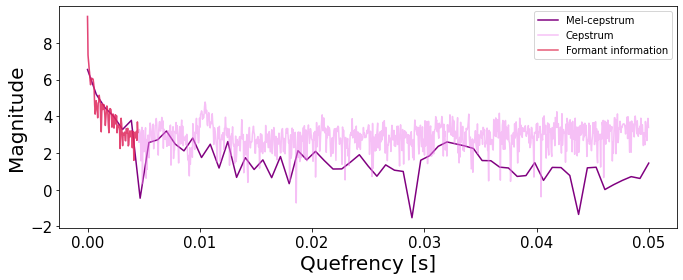

In [1048]:
# cepstrum
'''

1/f0 = peak

1/98 = 0.0102 


'''

sr=fs
n_fft= len(X)*2 #Double check
n_mels = 128

# Mel filter the spectrum X
mel = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)
# X_mel_filtered = mel.dot(X[:mel.shape[1]])
# X_mel_filtered = mel[:X.shape[1]].dot(X)
X_mel_filtered = mel[:,:-1].dot(X)

# Cepstrum
log_X = np.log(X_mel_filtered)
mel_cepstrum = np.fft.rfft(log_X)
df = freq_vector[1] - freq_vector[0]
mel_quefrency_vector = np.fft.rfftfreq(log_X.size, df)

fig, ax = plt.subplots(figsize = (9.6,4))
ax.plot(mel_quefrency_vector,np.log(abs(mel_cepstrum)), label='Mel-cepstrum', color = 'purple')
ax.set_xlabel('Quefrency [s]', fontsize=fontsize)
ax.set_ylabel('Magnitude', fontsize=fontsize)

ax.plot(quefrency_vector,np.log(abs(cepstrum)), label='Cepstrum', alpha=0.5, color = 'violet')

ax.plot(quefrency_vector[:100],np.log(abs(cepstrum))[:100], label='Formant information', alpha=0.7, color = 'crimson')


plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)
plt.legend()
plt.tight_layout()

if savefig:
    plt.savefig(output_dir+f'mel-cepstrum_{wav_name}.png', dpi=300,  facecolor='w')
# ax.set_yticks(fontsize=ticksize)

In [1049]:

# wav_name = 'rainbow'
# fs, signal = scipy.io.wavfile.read(input_dir+f'{wav_name}.wav')  # File assumed to be in the same directory
# start = 0.46 #rainbow: 0.46 0.1, long_ah = 0.8, 0.7
# duration = 0.1
# signal_to_use = signal[int(start*fs):int((start+duration)*fs)]

# plt.figure(figsize=(9.8,4))
# plt.magnitude_spectrum(signal_to_use, Fs=fs)
# xlim_max = 300
# plt.xlim(0,xlim_max)
# plt.ylabel('Magnitude', fontsize = fontsize)
# plt.xlabel('Frequency [Hz]', fontsize = fontsize)
# plt.xticks(ticks=range(0,xlim_max,200 ), fontsize=ticksize)
# plt.yticks(fontsize=ticksize)
# plt.tight_layout()
# if savefig:
#     start_str = str(start).replace('0.', '')
#     duration_str = str(duration).replace('0.', '')
#     plt.savefig(output_dir+f'spectrum_{start_str}-{duration_str}_{wav_name}.png', dpi=300,  facecolor='w')



In [1050]:

# wav_name = 'rainbow'
# fs, signal = scipy.io.wavfile.read(input_dir+f'{wav_name}.wav')  # File assumed to be in the same directory
# start = 0.47 #rainbow: 0.46 0.1, long_ah = 0.8, 0.7
# duration = 0.1
# signal_to_use = signal[int(start*fs):int((start+duration)*fs)]

# plt.figure(figsize=(9.8,4))
# plt.magnitude_spectrum(signal_to_use, Fs=fs)
# xlim_max = 3000
# plt.xlim(0,xlim_max)
# plt.ylabel('Magnitude', fontsize = fontsize)
# plt.xlabel('Frequency [Hz]', fontsize = fontsize)
# plt.xticks(ticks=range(0,xlim_max,200 ), fontsize=ticksize)
# plt.yticks(fontsize=ticksize)
# plt.tight_layout()



In [1051]:



# # low pass filter
# plt.figure(figsize=(12,4))

# plt.subplot(211)
# plt.plot(w_freqaxis[w_freqaxis<=5000],np.log(abs(w_stft[11][w_freqaxis<=5000])))
# plt.ylabel('Magnitude STFT')




In [1052]:

def stft2level(stft_spectra,max_freq_bin):
    magnitude_spectra = [ abs(x) for x in stft_spectra ]
    max_magnitude = max([ max(x) for x in magnitude_spectra ])
    min_magnitude = max_magnitude / 1000.0
    for t in range(0,len(magnitude_spectra)):
        for k in range(0,len(magnitude_spectra[t])):
            magnitude_spectra[t][k] /= min_magnitude
            if magnitude_spectra[t][k] < 1:
                magnitude_spectra[t][k] = 1
    level_spectra = [ 20*np.log10(x[0:max_freq_bin]) for x in magnitude_spectra ]
    return(level_spectra)


def sgram(x,frame_skip,frame_length,fft_length, fs, max_freq):
    frames = enframe(x,frame_skip,frame_length)
    (spectra, freq_axis) = stft(frames, fft_length, fs)
    sgram = stft2level(spectra, int(max_freq*fft_length/fs))
    max_time = len(frames)*frame_skip/fs
    return(sgram, max_time, max_freq)

In [226]:
0.004*fs

176.4

In [635]:
import os
import pandas as pd
formants = pd.read_csv(input_dir+'formants.csv', sep = '   ')
formants

/Users/danielmlow/miniconda3/envs/edaic/lib/python3.6/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,Time_s,F1_Hz,F2_Hz,F3_Hz,F4_Hz
0,0.026689,471.231361,1491.274942,2757.062448,3833.062314
1,0.032939,476.715444,1562.308540,2845.200066,3785.746660
2,0.039189,475.207822,1581.408823,2906.027367,4557.781604
3,0.045439,462.278511,889.457217,2792.491023,3882.239542
4,0.051689,325.621936,460.677749,2789.077932,3862.090152
...,...,...,...,...,...
108,0.701689,501.559658,1096.776363,2724.235080,3669.324954
109,0.707939,505.277473,1093.611396,2568.897568,3720.305888
110,0.714189,502.251579,1179.598029,2616.502023,3684.724165
111,0.720439,500.092601,1255.883097,2605.762466,3798.143383


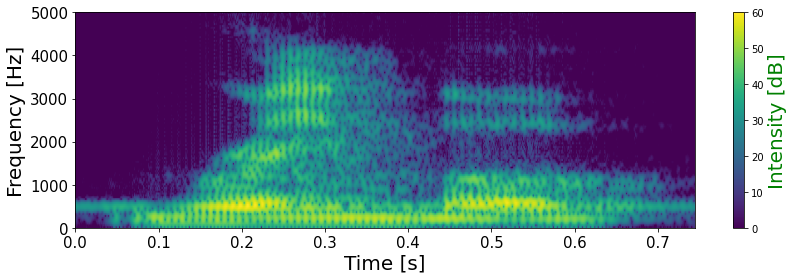

In [647]:
# broadband 002, 004


plot_formants = False
savefig = True

window = 0.010 #(0.010 = 10 msec)

(p_sgram, p_maxtime, p_maxfreq) = sgram(signal_all, int(0.001*fs), int(window*fs), 1024, fs, 5000)
plt.figure(figsize=(12,4))


plt.imshow(np.transpose(np.array(p_sgram)),origin='lower',extent=(0,p_maxtime,0,p_maxfreq),aspect='auto')
plt.ylabel('Frequency [Hz]', fontsize = fontsize)
plt.xlabel('Time [s]', fontsize = fontsize)

plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)

if plot_formants:
    for col in formants.columns.drop('F4_Hz'):
        plt.plot(range(formants.shape[0]),formants[col].values, color='crimson', linestyle='dashed')

cbar = plt.colorbar()
cbar.set_label('Intensity [dB]', rotation=90, color='green', fontsize=fontsize)




plt.tight_layout()
if savefig:
    plt.savefig(output_dir+f'spectrogram_broadband_{wav_name}.png', dpi=300,  facecolor='w')






### Narrowband 
A narrowband spectrogram is created using a window which is longer than  2T0 (2 x pitch period). For example, the spectrogram below is narrowband, since  35 ms is longer than  T0  of the female speaker. In a narrowband spectrogram, each individual spectral slice has harmonics of the pitch frequency. Therefore you can estimate the pitch frequency by counting the number of harmonics below 1000Hz. In this case, there are 4 harmonics below 1000Hz, so the pitch frequency is about  F0=1000/4=250 Hz. That matches, very well, the pitch period of  T0=4 ms that we estimated before.

**F0 = 1000/(number of harmonics below 1000)**





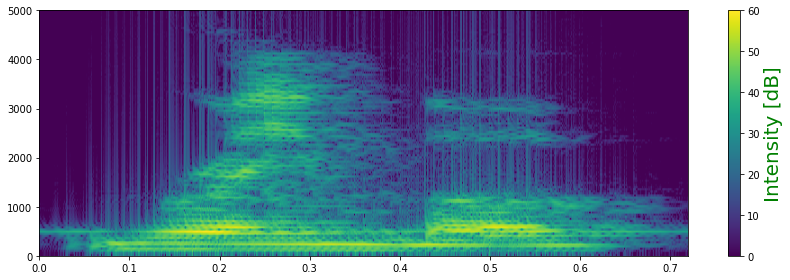

In [244]:
# narrowband 0.001, 2T0: 2 times pitch period (10msec for lower pitch voice, 4 for higher): 0.035

(p_sgram, p_maxtime, p_maxfreq) = sgram(signal_all, int(0.001*fs), int(0.035*fs), 1024, fs, 5000)
plt.figure(figsize=(12,4))
plt.imshow(np.transpose(np.array(p_sgram)),origin='lower',extent=(0,p_maxtime,0,p_maxfreq),aspect='auto')
cbar = plt.colorbar()
cbar.set_label('Intensity [dB]', rotation=90, color='green', fontsize=fontsize)
plt.tight_layout()
if savefig:
    plt.savefig(output_dir+f'spectrogram_narrowband_{wav_name}.png', dpi=300,  facecolor='w')


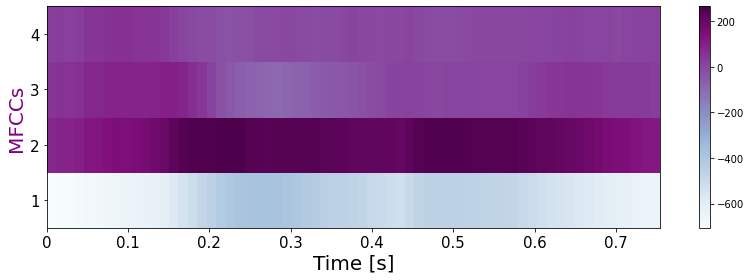

In [1036]:
plt.figure(figsize=(11.5,4))

signal, fs = librosa.load(input_dir+'rainbow.wav', sr=44100)
mfccs = librosa.feature.mfcc(y=signal, sr=fs, n_mfcc=4)
ax = librosa.display.specshow(mfccs, sr=fs, x_axis='time', cmap='BuPu')
# fig.axis('on')
plt.ylabel('MFCCs', fontsize = fontsize, color='purple')
plt.xlabel('Time [s]', fontsize = fontsize)
ax.axes.set_yticks(np.arange(0.5,4.5),)
ax.axes.set_yticklabels(range(1,5))
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)
cbar = plt.colorbar()
# cbar.set_label('Intensity [dB]', rotation=90)
plt.tight_layout()
if savefig: 
    plt.savefig(output_dir+f'mel-spectrogram_{wav_name}.png', dpi=300,  facecolor='w')
# ax.set_yticklabels(range(1,5))

In [2]:
# https://haythamfayek.com/2016/04/21/speech-processing-for-machine-learning.html
# http://www.practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/
# https://medium.com/tencent-thailand/music-information-retrieval-part-1-using-librosa-to-extract-audio-features-6e8569537185
